## Making Meshes with MeshPy ( using meshtools )

Gallery with short code comments

by

Jürgen Weizenecker


In [2]:
import numpy as np
import meshtools as mt
import meshpy.triangle as triangle
import numpy.linalg as la
import matplotlib.pyplot as plt


length=0.3


### Figure 1

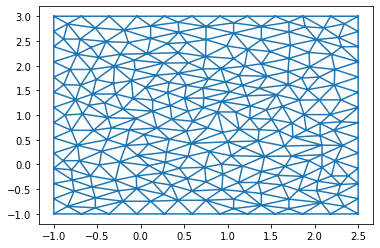

Points,  [[-1.         -1.        ]
 [-0.68181818 -1.        ]
 [-0.36363636 -1.        ]
 [-0.04545455 -1.        ]
 [ 0.27272727 -1.        ]] ....
Elements,  [[ 70   1   2]
 [ 47   0  48]
 [ 48  49  65]
 [  0   1  48]
 [ 49 120  66]] ...
Boundary edges [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46], [46, 47], [47, 0], [0, 1]]
List for boundary edges [0, 48]
Boundary triangles [0, 1, 3, 5, 8, 9, 17, 23, 25, 26, 29, 30, 31, 33, 35, 42, 44, 46, 50, 53, 60, 61, 62, 64, 65, 72, 73, 75, 78, 79, 80, 84, 85, 93, 106, 109, 123, 134, 142, 145, 146, 148, 159, 160, 172, 246, 282, 314]


################  Help string

In [3]:

# Simple mesh rectangle

# Define closed boundary around a 2D region
p,v=mt.RectangleSegments([-1.,-1.],[2.5,3.],edge_length=length)
# Make mesh of this region 
poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length)

print("Points, ",poi[0:5],"....",flush=True)
print("Elements, ",tri[0:5],"...",flush=True)
print("Boundary edges",BouE,flush=True)
print("List for boundary edges",li_BE,flush=True)
print("Boundary triangles",bou_elem,flush=True)

# Help
print("\n\n################  Help string :")
print( mt.RectangleSegments.__doc__ )
# oder
help(mt.RectangleSegments)
print( mt.DoTriMesh.__doc__ )

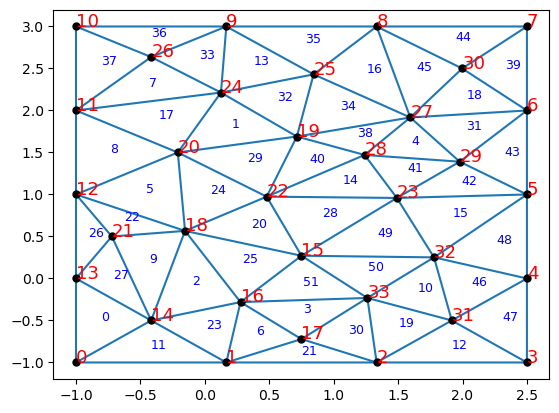

In [10]:
# Simple mesh rectangle with numbers
p,v=mt.RectangleSegments([-1.,-1.],[2.5,3.],edge_length=3*length)
poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=3*length,show=False)

mt.PlotMeshNumbers(poi,tri)


Plot mesh directly and colorize triangles

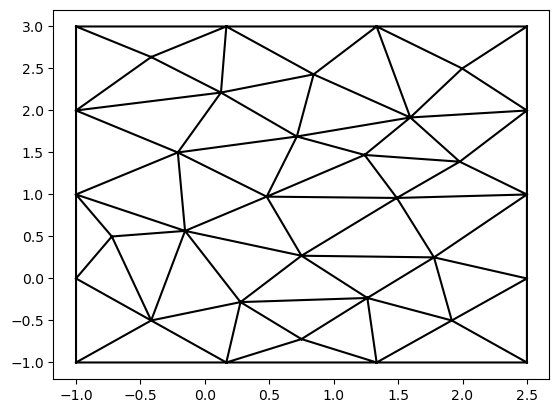

In [31]:
plt.triplot(poi[:,0],poi[:,1],tri,color='black')
plt.show()

### Figure 2

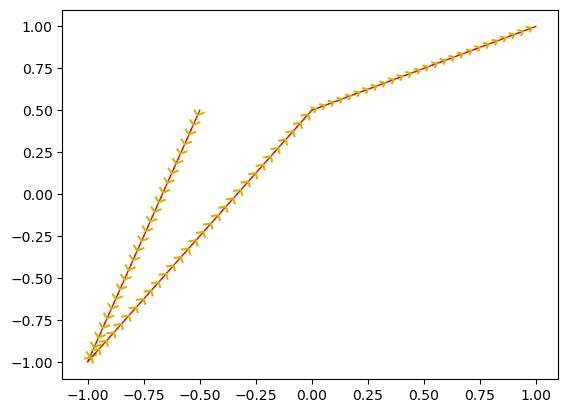

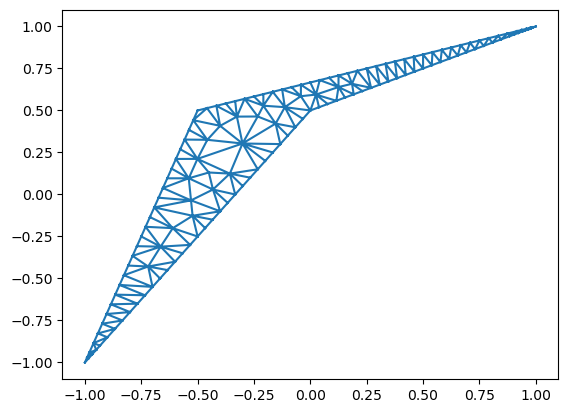

In [8]:

# construct boundary curve from simple lines 
p1,v1=mt.LineSegments([-0.5,0.5],[-1,-1],edge_length=length/5)
p2,v2=mt.LineSegments([-1,-1],[0.,0.5],edge_length=length/5)
p3,v3=mt.LineSegments([0.,0.5],[1,1],edge_length=length/7)
p4,v4=mt.LineSegments([1,1],[-0.5,0.5],edge_length=length/7)
p,v=mt.AddMultipleSegments(p1,p2,p3,p4)

# test segments (geometry and orientation) with PLotBoundary
mt.PlotBoundary(p1,v1,'Segments')
mt.PlotBoundary(p2,v2,'Segments')
mt.PlotBoundary(p3,v3,'Segments')
plt.show()

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length)
plt.show()

### Figure 3

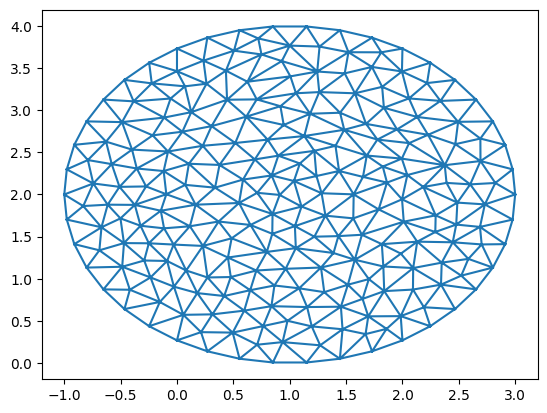


  CircleSegments(middle,radius,num_points=10,a_min=0.,a_max=2.*np.pi,edge_length=-1)
  


In [5]:
# circle as boundary curve
p,v=mt.CircleSegments([1,2],2,edge_length=length)
mt.DoTriMesh(p,v,edge_length=length);

print( mt.CircleSegments.__doc__ )

### Figure 4

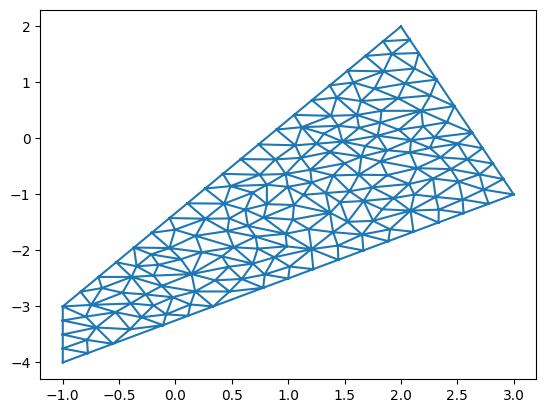

In [6]:
#
p1,v1=mt.LineSegments([2,2],[-1,-3],edge_length=length)
p2,v2=mt.LineSegments([-1,-4],[3,-1],num_points=10)
p,v=mt.AddSegments(p1,p2,closed=True)
mt.DoTriMesh(p,v,edge_length=length);

### Figure 5

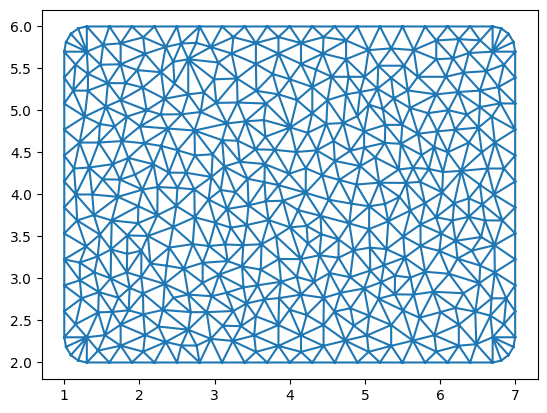

In [7]:
#
# rectangle with smooth corners
#
p,v=mt.ORecSegments([1,2],[7,6],0.3,edge_length=length,num_pc=10)
mt.DoTriMesh(p,v,edge_length=length);

### Figure 6

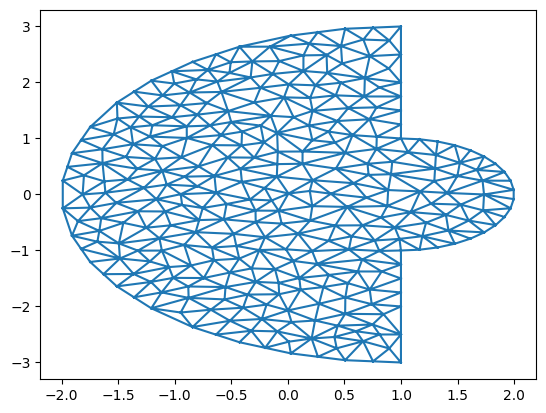

In [8]:
# 
# two semicircles
#
p1,v1=mt.CircleSegments([1.,0],1,a_min=-np.pi/2,a_max=np.pi/2,num_points=20)
p2,v2=mt.CircleSegments([1,0],3,a_min=np.pi/2.,a_max=3.*np.pi/2,num_points=20)
p,v=mt.AddSegments(p1,p2,closed=True)
# plot mesh 
mt.DoTriMesh(p,v,edge_length=length);

### Figure 7

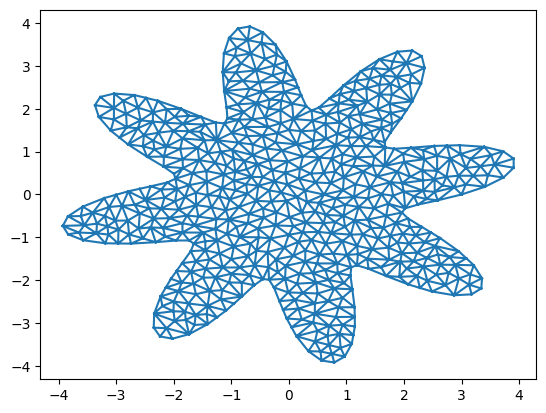

In [9]:
#
# boundary curve defined by simple points
#
t=np.linspace(0,2*np.pi,120)
r=3+np.sin(8*t)
x=r*np.cos(t)
y=r*np.sin(t)
p=[(x[j],y[j]) for j in range(len(t))]
p1,v1=mt.PointSegments(p)
mt.DoTriMesh(p1,v1,edge_length=length);

### Figure 8, without meshtools

[[ 1.  0.]
 [ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]] ...
[[ 22  23  44]
 [ 24  25  48]
 [ 44  34 255]
 [ 57  60  56]
 [ 34  44  46]] ....


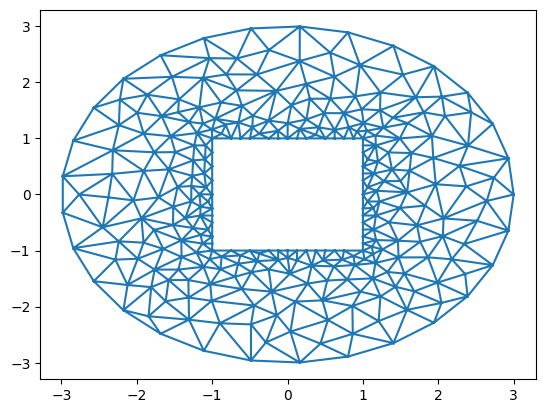

In [10]:
#
# Example for using directly triangle
#

def round_trip_connect(start, end):
  return [(i, i+1) for i in range(start, end)] + [(end, start)]

points = [(1,0),(1,1),(-1,1),(-1,-1),(1,-1),(1,0)]
facets = round_trip_connect(0, len(points)-1)

circ_start = len(points)
points.extend(
        (3 * np.cos(angle), 3 * np.sin(angle))
        for angle in np.linspace(0, 2*np.pi, 29, endpoint=False))

facets.extend(round_trip_connect(circ_start, len(points)-1))

def needs_refinement(vertices, area):
    bary = np.sum(np.array(vertices), axis=0)/3
    max_area = 0.01 + abs((la.norm(bary, np.inf)-1))*0.1
    return bool(area > max_area)

info = triangle.MeshInfo()
info.set_points(points)
info.set_holes([(0,0)])
info.set_facets(facets)

mesh = triangle.build(info, refinement_func=needs_refinement)
#mesh = triangle.build(info) 

mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)

print(mesh_points[0:5],"...")
print(mesh_tris[0:5],"....")
plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
plt.show()

### Figure 9, Add inner curves

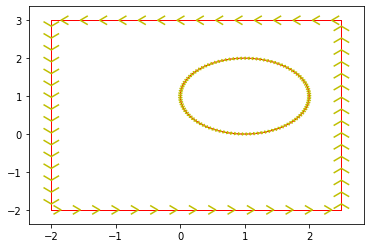

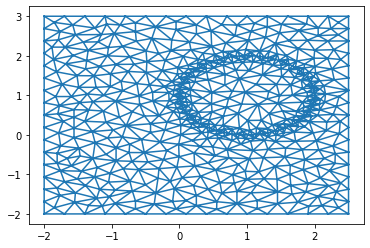

Points,  [[-2.  -2. ]
 [-1.7 -2. ]
 [-1.4 -2. ]
 [-1.1 -2. ]
 [-0.8 -2. ]] ...
Elements,  [[  0   1 407]
 [130 197 196]
 [120 185 121]
 [407 408 491]
 [ 61 407 491]] ...
Boundary Edges [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]] ...
List boundary edges [0, 62]
Inner Curves [[62, 166], [166, 165], [165, 164], [164, 163], [163, 162]] ...
List inner Curve [0, 105]


In [8]:
#
# rectangle and inner circle
#
p1,v1=mt.RectangleSegments([-2,-2],[2.5,3],edge_length=length)

p2,v2=mt.CircleSegments([1,1],1,edge_length=length/5)
p,v=mt.AddCurves(p1,v1,p2,v2)

# test Segments/Curves made
mt.PlotBoundary(p,v,'Segments')
plt.show()

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length)
print("Points, ",poi[0:5],"...")
print("Elements, ",tri[0:5],"...")
print("Boundary Edges",BouE[0:5],"...")
print("List boundary edges",li_BE)
print("Inner Curves",CuE[0:5],"...")
print("List inner Curve",li_CE)



### Figure 10

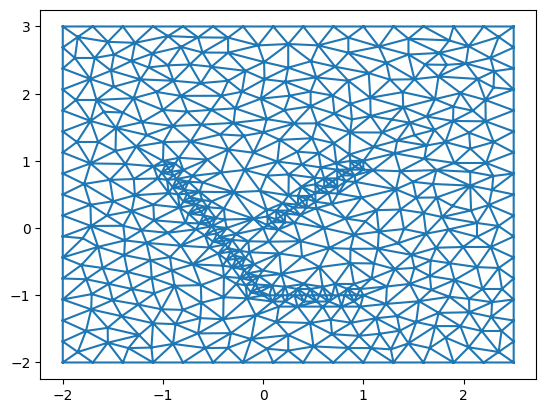

In [12]:
#
# rectangle and inner line
#
p1,v1=mt.RectangleSegments([-2,-2],[2.5,3],edge_length=length)
p2,v2=mt.LineSegments([0,0],[1,1],edge_length=length/5)


p3,v3=mt.LineSegments([-1,1],[0,-1],edge_length=length/5)
p4,v4=mt.LineSegments([0,-1],[1,-1],edge_length=length/5)
# connect line 3 and 4 first
p5,v5=mt.AddSegments(p3,p4)

p,v,indizes=mt.AddMultipleCurves(p1,v1,p2,v2,p5,v5)

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length)

### Figure 11

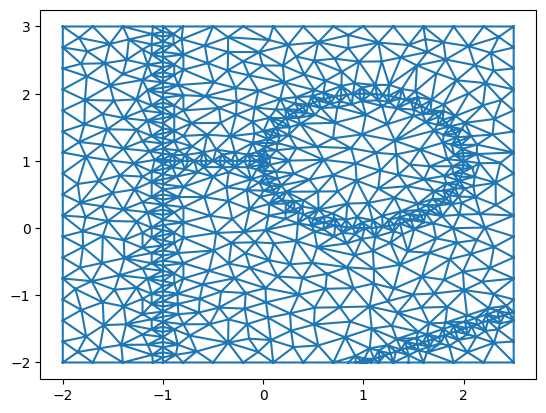

In [13]:
#
# rectangle and more complicated inner curves 
#
p1,v1=mt.RectangleSegments([-2,-2],[2.5,3],edge_length=length)

p2,v2=mt.CircleSegments([1,1],1,edge_length=length/5)
p,v=mt.AddCurves(p1,v1,p2,v2)

# use connect if segments might have nearly the same points
p3,v3=mt.LineSegments([-1,-2],[-1,3],edge_length=length/4)
p,v=mt.AddCurves(p,v,p3,v3,connect=True,eps=1e-12)

p4,v4=mt.LineSegments([-1,1],[0,1],edge_length=length/5)
p,v=mt.AddCurves(p,v,p4,v4,connect=True,eps=1e-12)

# or shift inner curve slightly

epsilon=1e-6
p5,v5=mt.LineSegments([1,-2+epsilon],[3-epsilon,-1],edge_length=length/5)
p,v=mt.AddCurves(p,v,p5,v5)

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length)


### Figure 12, Holes

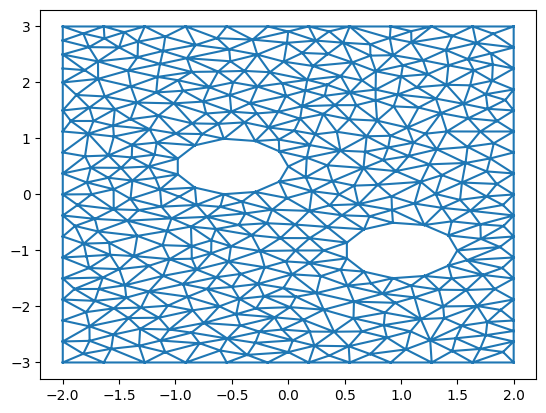

In [14]:
#
# rectangle with holes
p1,v1=mt.LineSegments([-2,-3],[2,-3],num_points=12)
p2,v2=mt.LineSegments([2,3],[-2,3],num_points=12)
p,v=mt.AddSegments(p1,p2,closed=True)

# define the boundary curves of holes
p3,v3=mt.CircleSegments([-0.5,0.5],0.5,edge_length=length)
p,v=mt.AddCurves(p,v,p3,v3)
p4,v4=mt.CircleSegments([1,-1],0.5,edge_length=length)
p,v=mt.AddCurves(p,v,p4,v4)

# the array holes contain points in the regions to be removed  
poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length,holes=[(-0.4,0.4),(0.95,-0.8)])

### Figure 13, Find closest nodes

Points given
 [[2.0, 0.0], [1.8019377358048383, 0.8677674782351162], [1.2469796037174672, 1.5636629649360596], [0.4450418679126289, 1.9498558243636472], [-0.4450418679126287, 1.9498558243636472], [-1.246979603717467, 1.5636629649360598], [-1.801937735804838, 0.8677674782351165], [-2.0, 2.4492935982947064e-16], [-1.8019377358048383, -0.867767478235116], [-1.2469796037174674, -1.5636629649360594], [-0.4450418679126292, -1.9498558243636472], [0.44504186791262845, -1.9498558243636472], [1.2469796037174667, -1.5636629649360598], [1.801937735804838, -0.8677674782351167], [2.0, -4.898587196589413e-16]]
Node number
 [23, 224, 393, 345, 307, 172, 214, 56, 272, 368, 389, 413, 112, 97, 23]
Distance from p0
 [0.00000000e+00 1.37154745e-01 1.33613461e-01 7.15991544e-02
 1.54500812e-01 1.21215475e-01 1.40122856e-01 2.44929360e-16
 1.20076358e-01 3.44714280e-02 7.93194092e-02 7.33448980e-02
 1.14532108e-01 1.15070002e-01 4.89858720e-16]


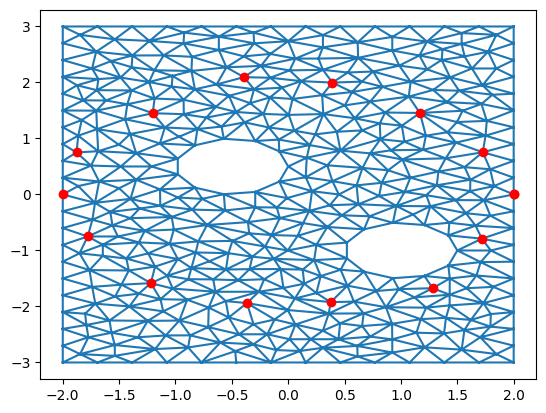

In [15]:
# boundary nodes
# rectangle with holes
p,v=mt.RectangleSegments([-2,-3],[2,3],edge_length=length)

p3,v3=mt.CircleSegments([-0.5,0.5],0.5,edge_length=length)
p4,v4=mt.CircleSegments([1,-1],0.5,edge_length=length)
p,v,ii=mt.AddMultipleCurves(p,v,p3,v3,p4,v4)

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length,holes=[(-0.4,0.4),(0.95,-0.8)],show=False)

# node numbers used for search
all_nodes = np.arange(len(poi))
# points to be found
p0=[ [2*np.cos(t),2*np.sin(t)] for t in np.linspace(0,2*np.pi,15)]

# search
nn,dd = mt.FindClosestNode(all_nodes,poi,p0)


print("Points given\n",p0)
print("Node number\n",nn)
print("Distance from p0\n",dd)

plt.triplot(poi[:, 0], poi[:, 1], tri)
plt.plot(poi[nn,0],poi[nn,1],'or');

### Figure 14 , Find Boundary

bseg[ 0 ] :  Nodes 
 [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
bseg[ 1 ] :  Segments 
 [[13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [31, 32], [32, 33], [33, 34], [34, 35], [35, 36], [36, 37], [37, 38], [38, 39], [39, 40], [40, 41], [41, 42], [42, 43], [43, 44], [44, 45], [45, 46]]
bseg[ 2 ] :  Nodes 
 [70, 69, 68, 67, 66, 76, 75, 74, 73, 72, 71]
bseg[ 3 ] :  Segments 
 [[87, 86], [86, 85], [85, 84], [84, 83], [83, 82], [82, 81], [81, 80], [80, 79], [79, 78], [78, 77], [77, 87]]


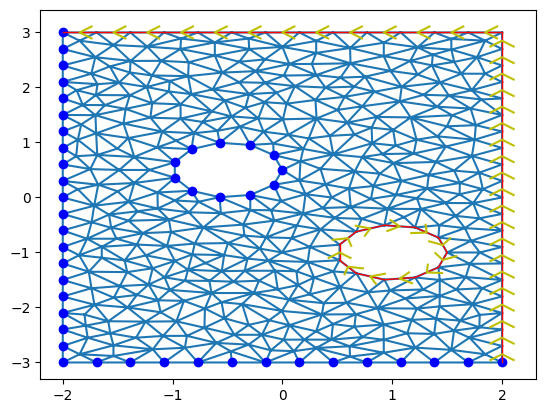

In [16]:
# take mesh from above

# Find boundary nodes/segments between the points below 
# Two types of boundaries, Nodes or segments
# Ps:  
Ps = [ [-2,3],[2,-3],[-2,3],[-0.5,0.5],[-0.5,0.5],[1,-1],[1,-1] ]
Ps_types = ['Nodes','Segments','Nodes','Segments']

bseg=mt.RetrieveSegments(poi,BouE,li_BE,Ps,Ps_types)
for i in range( len(Ps_types) ):
  print("bseg[",i,"] : ",Ps_types[i],"\n",bseg[i])

# !!!!!!!!!!!!!!!!!!!!!!!!!
# bseg[0] contains all nodes (Ps_types[0]) between Ps[0] and Ps[1]
# bseg[1] contains all segments (Ps_types[1]) between Ps[1] and Ps[2]
# No connection between Ps[2] and Ps[3] , skip
# bseg[2] contains all nodes (Ps_types[2]) between Ps[3] and Ps[4]
# bseg[3] contains all nodes (Ps_types[3]) between Ps[4] and Ps[5]


plt.triplot(poi[:, 0], poi[:, 1], tri)

for i in range(len(Ps_types)):
  mt.PlotBoundary(poi,bseg[i],Ps_types[i])
plt.show()

### Figure 15 , Find Inner Curves

cseg [[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81], [[124, 123], [123, 122], [122, 121], [121, 120], [120, 119], [119, 118], [118, 117], [117, 116], [116, 115], [115, 114], [114, 113], [113, 112], [112, 111], [111, 110], [110, 109], [109, 108], [108, 149], [149, 148], [148, 147], [147, 146], [146, 145], [145, 144], [144, 143], [143, 142], [142, 141], [141, 140], [140, 139], [139, 138], [138, 137], [137, 136], [136, 135], [135, 134], [134, 133], [133, 132], [132, 131], [131, 130], [130, 129], [129, 128], [128, 127], [127, 126], [126, 125], [125, 124]]]


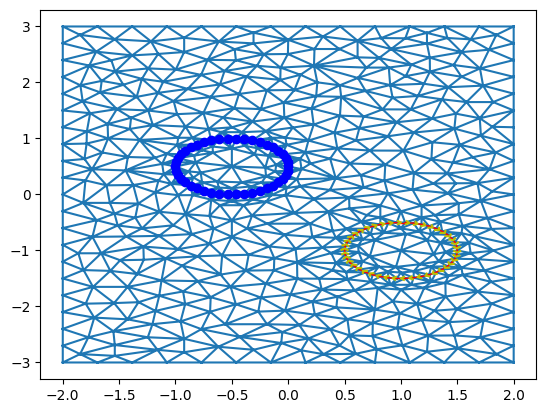

In [17]:
#
# rectangle with holes
p,v=mt.RectangleSegments([-2.,-3.],[2,3.],edge_length=length)
p3,v3=mt.CircleSegments([-0.5,0.5],0.5,edge_length=length/4)
p,v=mt.AddCurves(p,v,p3,v3)
p4,v4=mt.CircleSegments([1,-1],0.5,edge_length=length/4)
p,v=mt.AddCurves(p,v,p4,v4)
poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length,show=False)

# same as before, with CuE and li_DE
Ps = [[-0.5,0.5],[-0.5,0.5],[1,-1],[1,-1] ]
Ps_types = ['Nodes','Segments']

cseg=mt.RetrieveSegments(poi,CuE,li_CE,Ps,Ps_types)
print("cseg",cseg)

plt.triplot(poi[:, 0], poi[:, 1], tri)

mt.PlotBoundary(poi,cseg[0],'Nodes')
mt.PlotBoundary(poi,cseg[1],'Segments')
plt.show()

### Figure 16

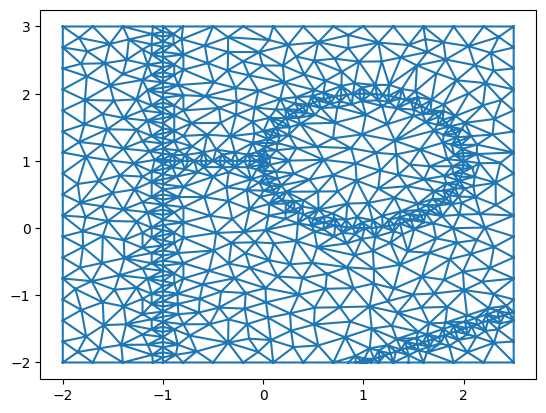

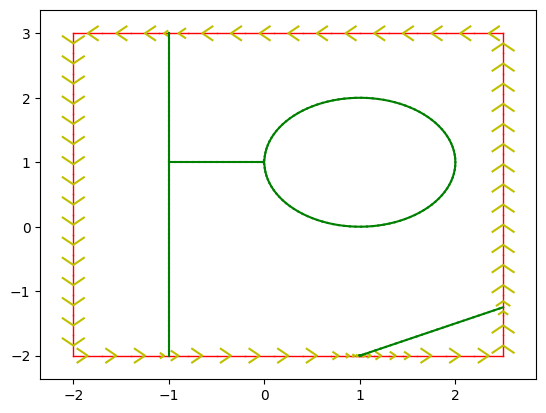

In [18]:
#
# rectangle and inner line
#
p1,v1=mt.RectangleSegments([-2,-2],[2.5,3],edge_length=length)

p2,v2=mt.CircleSegments([1,1],1,edge_length=length/5)
p,v=mt.AddCurves(p1,v1,p2,v2)

# use connect if segments might have nearly the same points
p3,v3=mt.LineSegments([-1,-2],[-1,3],edge_length=length/4)
p,v=mt.AddCurves(p,v,p3,v3,connect=True,eps=1e-12)

p4,v4=mt.LineSegments([-1,1],[0,1],edge_length=length/5)
p,v=mt.AddCurves(p,v,p4,v4,connect=True,eps=1e-12)

# or shift inner curve slightly away from existing points/curves
epsilon=1e-6
p5,v5=mt.LineSegments([1,-2+epsilon],[3-epsilon,-1],edge_length=length/5)
p,v=mt.AddCurves(p,v,p5,v5)

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length)

# plot all boundaries and inner curves
mt.PlotBoundary(poi,BouE,'Segments')
mt.PlotBoundary(poi,CuE,'Curves')

### Figure 17, Refinement

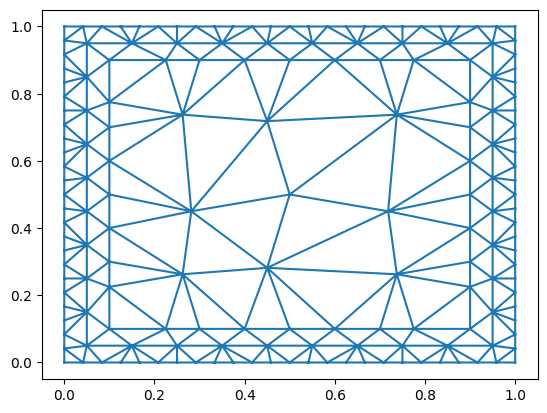

In [19]:
#
# rectangle and local refinement 
#
p1,v1=mt.RectangleSegments([0,0],[1,1],num_points=100)
p2,v2=mt.RectangleSegments([0.05,0.05],[0.95,0.95],num_points=40)
p,v=mt.AddCurves(p1,v1,p2,v2)
p3,v3=mt.RectangleSegments([0.1,0.1],[0.9,0.9],num_points=20)
p,v=mt.AddCurves(p,v,p3,v3)
mt.DoTriMesh(p,v,edge_length=length);

### Figure 18

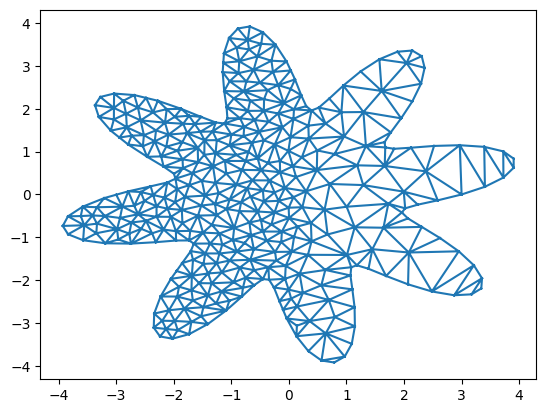

In [20]:
#
# 2D curve with local mesh refinement I
#
# 
t=np.linspace(0,2*np.pi,120)
r=3+np.sin(8*t)
x=r*np.cos(t)
y=r*np.sin(t)
p=[(x[j],y[j]) for j in range(len(t))]
p1,v1=mt.PointSegments(p)
# function for refinement

def myrefine1(tri_points, area):
  center_tri = np.sum(np.array(tri_points), axis=0)/3.
  x=center_tri[0]
  y=center_tri[1]
  if x>0:
    max_area=0.05*(1+3*x)
  else:
    max_area=0.05
  return bool(area>max_area)

mt.DoTriMesh(p1,v1,tri_refine=myrefine1);

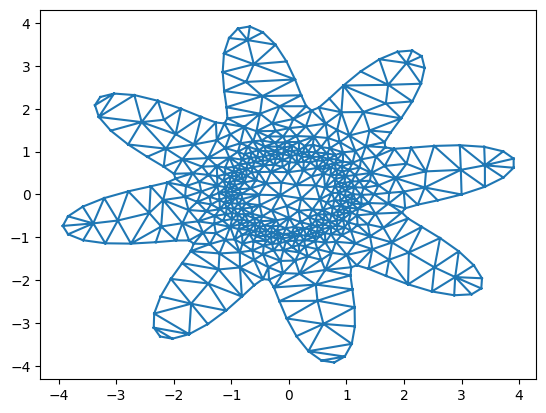

In [21]:
# function for refinement
def myrefine2(tri_points, area):
  center_tri = np.sum(np.array(tri_points), axis=0)/3.
  r=np.sqrt(center_tri[0]**2+center_tri[1]**2) 
  max_area=0.3+(0.01-0.3)/(1+0.5*(r-1)**2)
  return bool(area>max_area);
mt.DoTriMesh(p1,v1,tri_refine=myrefine2);

### Figure 19

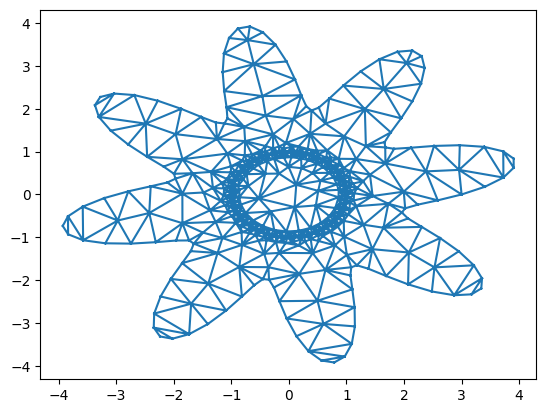

In [22]:
#
# 2D curve with local refinement II
# !! 2 plots
#
# take p1 from above
p2,v2=mt.CircleSegments([0,0],1,edge_length=0.05)
p,v=mt.AddCurves(p1,v1,p2,v2)

def myrefine3(tri_points, area):
  center_tri = np.sum(np.array(tri_points), axis=0)/3.
  r=np.sqrt(center_tri[0]**2+center_tri[1]**2) 
  max_area=0.4+(0.01-0.3)/(1+0.5*(r-1)**2)
  return bool(area>max_area);
  

poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,tri_refine=myrefine3)

### Figure 20

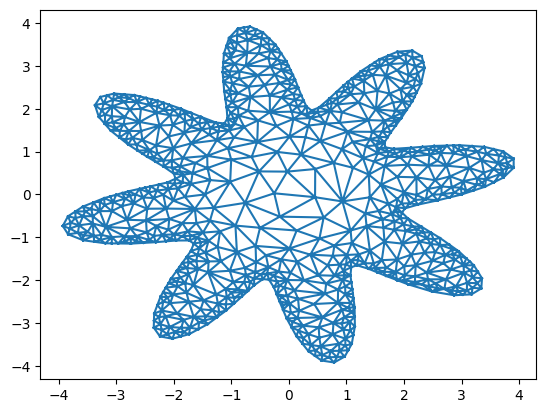

In [23]:
#
# 2D curve with local refinement III
# 
#
# take p1 from above
nodes=range(len(p1))
# define tree to speed up node search
from scipy.spatial import cKDTree
p1tree=cKDTree(np.array(p1))

# function for refinement
def myrefine3(tri_points, area):
  center_tri = np.sum(np.array(tri_points), axis=0)/3.
  p0=[(center_tri[0],center_tri[1])]
  node,r=mt.FindClosestNode(nodes,[],p0,tree=p1tree)
  r=r[0]
  max_area=0.3+(0.01-0.3)/(1+r**2) 
  return bool(area>max_area);

mt.DoTriMesh(p1,v1,tri_refine=myrefine3);

### Figure 21

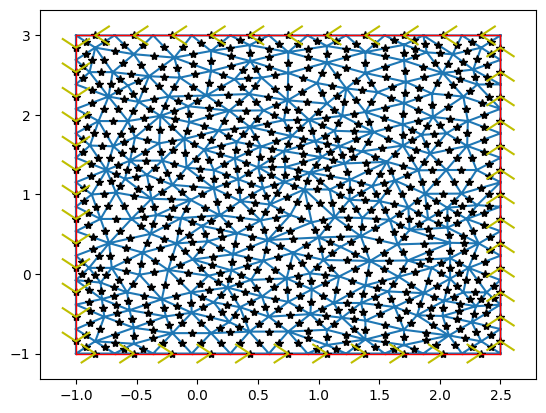

points: [[-1.         -1.        ]
 [-0.68181818 -1.        ]
 [-0.36363636 -1.        ]
 [-0.04545455 -1.        ]
 [ 0.27272727 -1.        ]] ....
elements [[ 70   1   2 264 265 266]
 [ 47   0  48 267 268 269]
 [ 48  49  65 270 271 272]
 [  0   1  48 273 274 268]
 [ 49 120  66 275 276 277]] ....
boundary [[1, 2, 265], [2, 3, 291], [3, 4, 409], [4, 5, 781], [5, 6, 613], [6, 7, 374], [7, 8, 380], [8, 9, 506], [9, 10, 436], [10, 11, 389], [11, 12, 396], [12, 13, 485], [13, 14, 352], [14, 15, 420], [15, 16, 615], [16, 17, 515], [17, 18, 813], [18, 19, 405], [19, 20, 735], [20, 21, 549], [21, 22, 453], [22, 23, 410], [23, 24, 470], [24, 25, 457], [25, 26, 456], [26, 27, 468], [27, 28, 440], [28, 29, 640], [29, 30, 445], [30, 31, 589], [31, 32, 369], [32, 33, 582], [33, 34, 339], [34, 35, 348], [35, 36, 343], [36, 37, 327], [37, 38, 330], [38, 39, 340], [39, 40, 590], [40, 41, 593], [41, 42, 322], [42, 43, 310], [43, 44, 566], [44, 45, 418], [45, 46, 278], [46, 47, 286], [47, 0, 267], [0, 

In [24]:
# Simple mesh rectangle with second order points
p,v=mt.RectangleSegments([-1.,-1.],[2.5,3.],edge_length=length)
poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length,order=2,show=None)

plt.triplot(poi[:, 0], poi[:, 1], tri[:,0:3])
maxi=np.max(tri[:,0:3])+1
plt.plot(poi[maxi:,0],poi[maxi:,1],'k*')
mt.PlotBoundary(poi,np.array(BouE),'Segments') 
plt.show()
print("points:",poi[0:5],"....")
print("elements",tri[0:5],"....")
print("boundary",BouE)

### Figure 22, connect meshes

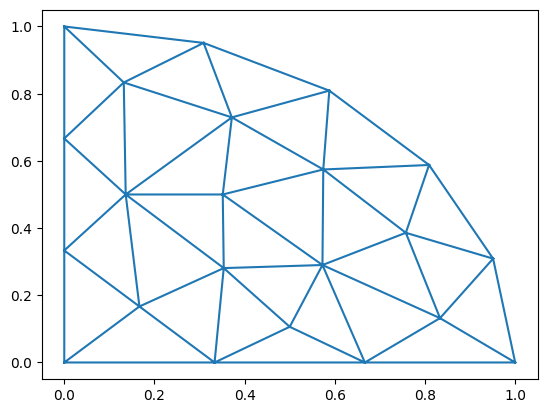

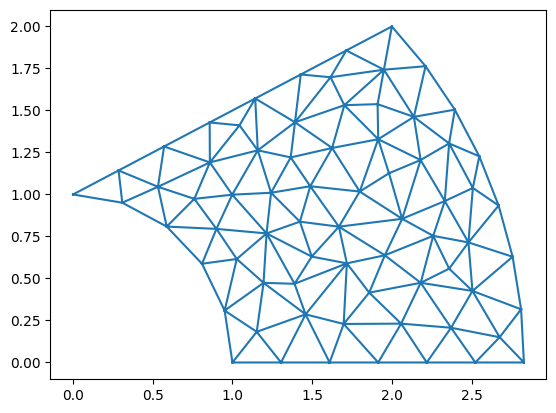

identical nodes found 6


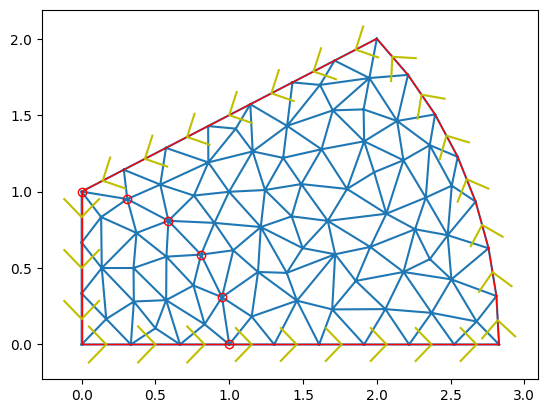

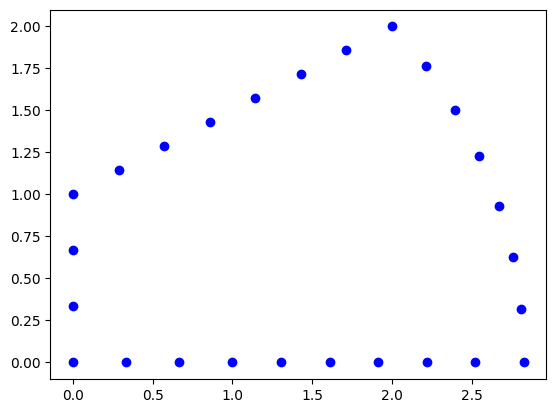

In [25]:
# connect mesh

# mesh A
p1,v1=mt.LineSegments([0,1],[0,0],edge_length=length)
p2,v2=mt.LineSegments([0,0],[1,0],edge_length=length)
p,v=mt.AddSegments(p1,p2)
p1,v1=mt.CircleSegments([0,0],1,a_min=0,a_max=np.pi/2,edge_length=length)
p,v=mt.AddSegments(p,p1)
pA,tA,bA,lA,bou_elemA,cuA,lcA=mt.DoTriMesh(p,v,edge_length=length)

#mesh B
p1,v1=mt.CircleSegments([0,0],1,a_min=0,a_max=np.pi/2,edge_length=length)
p2,v2=mt.LineSegments([0,1],[2,2],edge_length=length)
p,v=mt.AddSegments(p1,p2)
p1,v1=mt.CircleSegments([0,0],2*np.sqrt(2),a_min=np.pi/4,a_max=0,edge_length=length)
p,v=mt.AddSegments(p,p1)
p1,v1=mt.LineSegments([2*np.sqrt(2),0],[1,0],edge_length=length)
p,v=mt.AddSegments(p,p1)
pB,tB,bB,lB,bou_elemB,cuB,lcB=mt.DoTriMesh(p,v,edge_length=length)

#connect
p,t,b,bl,idn=mt.ConnectMesh(pA,tA,bA,pB,tB,bB,epsilon=1e-8)
plt.triplot(p[:, 0],p[:, 1],t[:,0:3])
k=[x[0] for x in idn]
plt.plot(p[k,0],p[k,1],'ro',mfc='none')

mt.PlotBoundary(p,np.array(b),'Segments')
plt.show()

Ps=[ [1,0],[1,0] ]
bseg=mt.RetrieveSegments(p,b,bl,Ps,['Nodes'])
mt.PlotBoundary(p,bseg[0],'Nodes')

plt.show() 

#### Computing values and displaying stuff

Sometimes the potential along lines, the Gradient or normal derivatives are desired

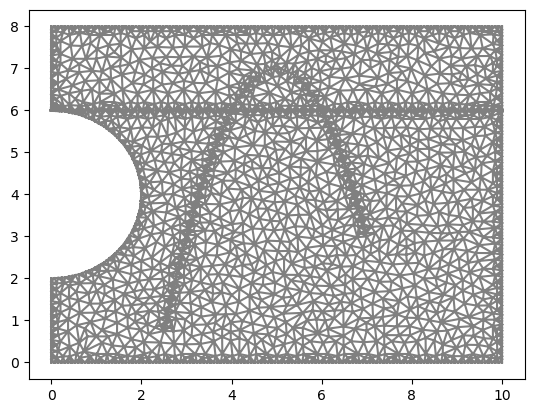

In [3]:
P1=[0,8]; P2=[0,0]; P3=[10,0]; P4=[10,8] 
R=2

ti0=5/2; ti1=7
P5=[ti0,-(ti0-5)**2+7]; P6=[ti1,-(ti1-5)**2+7]
P7=[1e-6,6]; P8=[10-1e-6,6]
length=0.3

# make mesh
#outer
p_c=[ [R*np.cos(t),4+R*np.sin(t)] for t in np.linspace(np.pi/2,-np.pi/2,int(R*np.pi/length)+1,endpoint=True) ]
p=[P1] + p_c + [P2,P3,P4,P1]
#inner
pi=[ [t,-(t-5)**2+7] for t in np.linspace(5/2,7,20) ]

#segments
pr,vr=mt.PointSegments(p,edge_length=length/4)
pi,vi=mt.PointSegments(pi,edge_length=length/4)
p,v=mt.AddCurves(pr,vr,pi,vi)

pl1,vl1=mt.LineSegments(P7,P8,edge_length=length/4)
p,v=mt.AddCurves(p,v,pl1,vl1,connect_points=[[4,6],[6,6]])


#mesh
poi,tri,BouE,li_BE,bou_elem,CuE,li_CE=mt.DoTriMesh(p,v,edge_length=length,show=False)

# define line path for normal derivative
# boundary
Ps=[P1,P3]; Ps_types=['Segments']
bseg=mt.RetrieveSegments(poi,BouE,li_BE,Ps,Ps_types)
# inner curve
Ps=[P5,P6]; Ps_types=['Segments']
cseg=mt.RetrieveSegments(poi,CuE,li_CE,Ps,Ps_types)

Ps=[P7,P8]; Ps_types=['Nodes']
cnod=mt.RetrieveSegments(poi,CuE,li_CE,Ps,Ps_types)

#plots
plt.triplot(poi[:,0],poi[:,1],tri,color='gray')

# Funktion phi=(x+3)*y
# two different cases, below and above inner curve
ii= (poi[:,1]+(poi[:,0]-5)**2-7<=0) & ( ((P6[1]-P5[1])/(P6[0]-P5[0])*(poi[:,0]-P5[0])+P5[1] - poi[:,1] )<=0 )  
phi=(poi[:,0]+3)*poi[:,1]
phi[ii] += 3*(poi[ii,1]+(poi[ii,0]-5)**2-7)

Display values on triangles patch

useful for verifying the alpha, beta and f for if cases

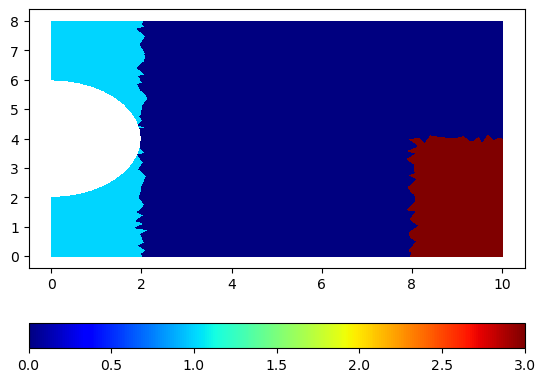

In [47]:
# define function on triangles

# all triangle center
pp=np.sum(poi[tri],axis=1)/3.
vals=np.zeros(len(tri))
vals[pp[:,0]<2] = 1
vals[(pp[:,0]>8) & (pp[:,1]<4)] = 3

plt.tripcolor(poi[:,0],poi[:,1],tri,vals,cmap='jet')
plt.colorbar(orientation='horizontal')
plt.show()

##### and the lines for the derivative, potential, field and the isolines

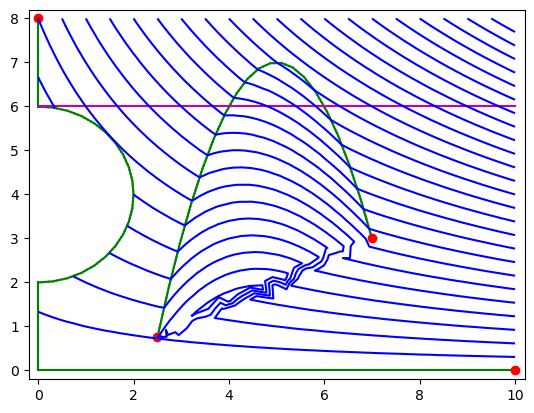

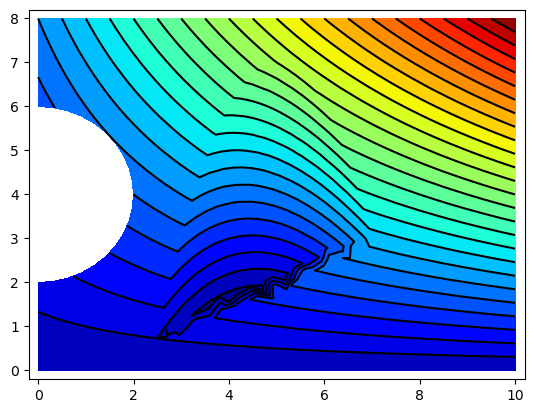

In [4]:
mt.PlotBoundary(poi,bseg[0],'Curves')
mt.PlotBoundary(poi,cseg[0],'Curves')
plt.plot(poi[cnod[0],0],poi[cnod[0],1],'-m')

for PP in [P1,P3,P5,P6]:
  plt.plot(PP[0],PP[1],'or')

# plot isolines
plt.tricontour(poi[:,0],poi[:,1],tri,phi,levels=30,colors='blue')
plt.xlim((-0.2,10.2))
plt.ylim((-0.2,8.2));

plt.show()
plt.tricontourf(poi[:,0],poi[:,1],tri,phi,levels=30,cmap='jet')
plt.tricontour(poi[:,0],poi[:,1],tri,phi,levels=30,colors='black')
plt.xlim((-0.2,10.2))
plt.ylim((-0.2,8.2));
plt.show()

#### Potential and el. field

you may compute Ex along a line y=const or Ey along a line x=const by means of the derivative

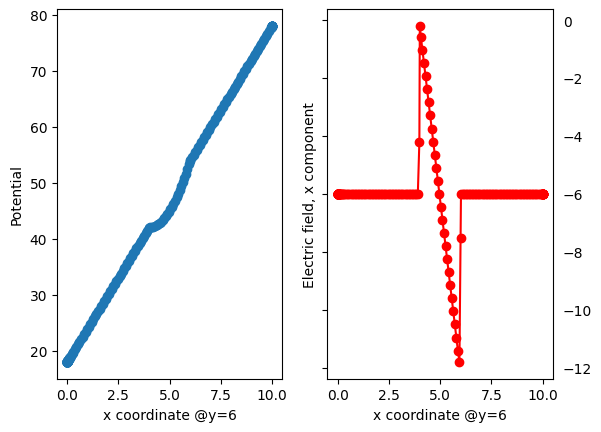

In [28]:
# potential and field (Ex) along y=6 
xx=poi[cnod[0],0]
ff=phi[cnod[0]]
Ex=-np.diff(ff)/np.diff(xx)

#plot
plt.subplot(1,2,1)
plt.plot(xx ,ff,'-o' )
plt.xlabel('x coordinate @y=6')
plt.ylabel('Potential')
plt.subplot(1,2,2)
plt.plot(xx[:-1] ,Ex,'-or' );
plt.xlabel('x coordinate @y=6')
plt.ylabel('Electric field, x component')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)




or use CompteGradient

In [29]:
help(mt.ComputeGradient)

Help on function ComputeGradient in module meshtools:

ComputeGradient(p, t, u, location='middle', num=10, p_loc=[])
    Compute the Gradient of a triangular mesh
    
    Input:   p    array([[x1,y1],[x2,y2],...])          node points
             t    array([[n1,n2,n3],[n4,n5,n6],...])    elements
             u    array([u1,u2,u3,.....])               function at node values
             location                                   'middle', 'nodes','grid','set' 
                                                        middle: compute at middle points of triangles:
                                                        nodes: compute at node points, as mean value 
             p_loc  array([[X1,Y1],[X2,Y2],...])        points for gradient evaluation (location must be 'set')
             num  N                                     generate NxN points array for p_loc (location must be 'grid' )
             
             
    Output:  x     x-component of point
             y     y-compon

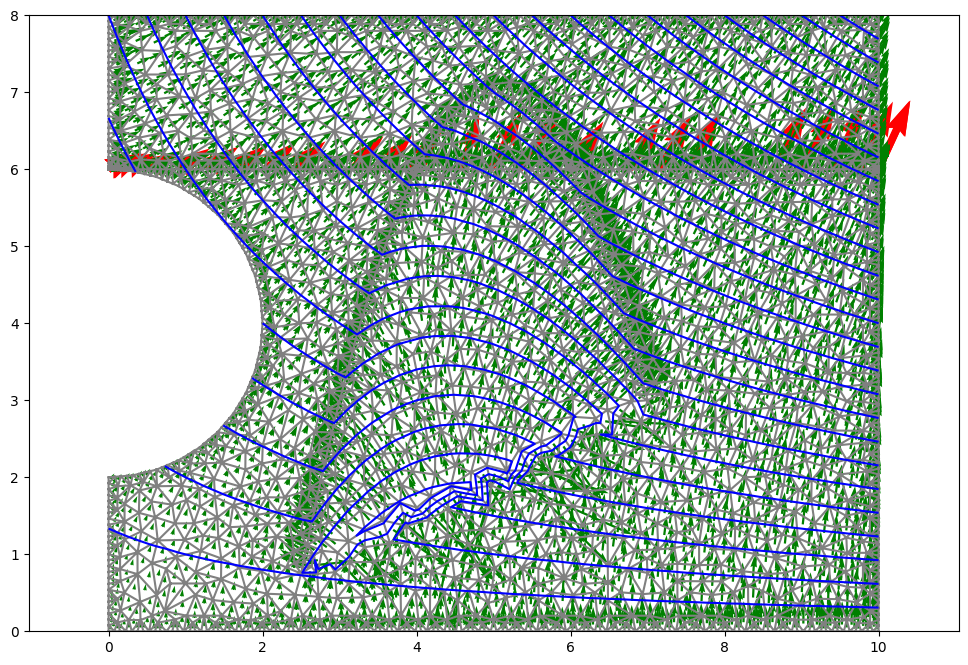

In [30]:
# points used for calculation

# take line y=6, but only each 5th point
pp0=poi[cnod[0][::5]]  
xx,yy,ggx,ggy=mt.ComputeGradient(poi,tri,phi,location='set',p_loc=pp0 )

#plot
plt.figure(figsize=(12,8))
           
plt.quiver(xx,yy,ggx,ggy,color='red')

xx,yy,ggx,ggy=mt.ComputeGradient(poi,tri,phi,location='middle' )
plt.quiver(xx,yy,ggx,ggy,color='green',scale=500)


plt.tricontour(poi[:,0],poi[:,1],tri,phi,levels=30,colors='blue')
plt.triplot(poi[:,0],poi[:,1],tri,color='gray')
plt.axis('equal');


##### Streamlines

lines where a given vector field is tangential.

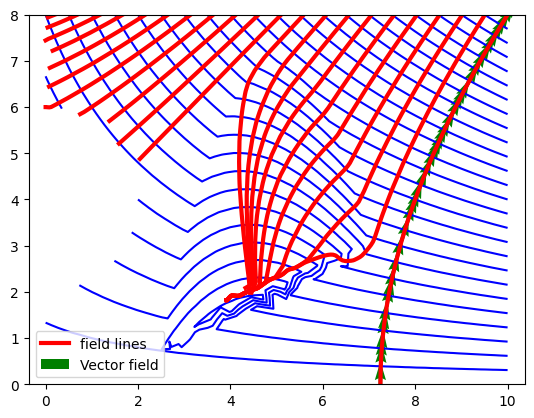

In [31]:
# possible with matplotlib only on rectangular meshes


# use pvista
import pyvista as pv

#transform mesh to pyvista mesh
tri_pv = np.insert(tri, 0, 3, axis=1).flatten()
poi_pv = np.insert(poi, 2, 0., axis=1)
cellt = len(tri)*[pv.CellType.TRIANGLE]
mesh_pv=pv.PolyData(poi_pv,tri_pv)

# set vector field vectors to mesh points
xx,yy,ggx,ggy=mt.ComputeGradient(poi,tri,phi,location='nodes')
mesh_pv.point_data.set_vectors( np.array([ggx,ggy,np.zeros(len(ggx))]).T , 'vectors' )
mesh_pv.set_active_vectors('vectors')

# define starting points of streamlines and compute streamlines
seed=pv.Line(pointa=(0.2, 8, 0.0), pointb=(10, 8, 0.0), resolution=20)
stream = mesh_pv.streamlines_from_source(seed,vectors='vectors', max_time=200,integration_direction='backward', initial_step_length=1,surface_streamlines=True)

# plot
plt.tricontour(poi[:,0],poi[:,1],tri,phi,levels=30,colors='blue')
for n in range(stream.number_of_cells):
  pp=stream.get_cell(n).points
  if n==0:
    plt.plot(pp[:,0],pp[:,1],'-r',lw=3,label='field lines')    
  else:
    plt.plot(pp[:,0],pp[:,1],'-r',lw=3)

pp=stream.get_cell(stream.number_of_cells-1).points

xx,yy,ggx,ggy=mt.ComputeGradient(poi,tri,phi,location='set',p_loc=pp[:,[0,1]])
plt.quiver(xx,yy,ggx,ggy,color='green',label='Vector field')
plt.axis('equal')   
plt.legend()


plt.show()

##### Normal derivative

Is defined as
$$
\frac{\partial \Phi}{\partial n}=grad (\Phi)\cdot\vec{n}
$$
where $\vec{n}$ is the normal vector of the boundary or an inner curve

In [32]:
help(mt.NormalDerivative)

Help on function NormalDerivative in module meshtools:

NormalDerivative(boundary, p, tt, u, inner=None, BouE=[], details=False)
    Compute the normal derivative on a given boundary
    
    Input:   boundary   [[n1,n2],[n3,n4],...]          boundary segments
             p    array([[x1,y1],[x2,y2],...])         node points
             t    array([[n1,n2,n3],[n4,n5,n6],...])   elements 
             u    array([u1,u2,u3,.....])              function at node values
             right                                     direction of inner node/element    
             details                                   if True  the gradient the normal vector and 
                                                  the element numbers are  additionally returnd
    
    Output:  
              nor       normal derivative at the segments
             rl        running length
             line_int  line integral over boundary of the normal derivative
             dictionary with details if details is

start point boundary:  [0. 8.]
start point inner curve:  [2.5  0.75]


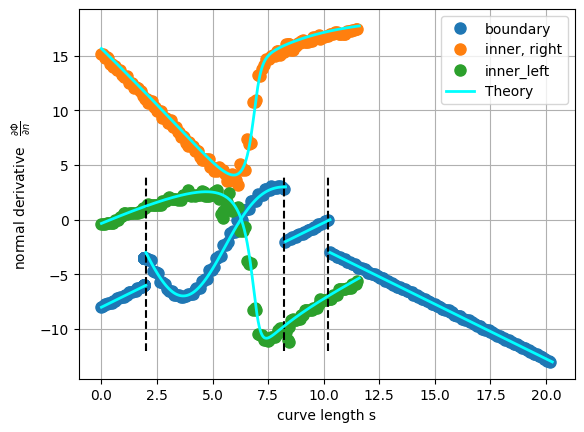

In [33]:
# boundry
dphidn0,s0,II0 = mt.NormalDerivative(bseg[0],poi,tri,phi,BouE=bou_elem)
#inner curve right side
dphidn1,s1,II1 = mt.NormalDerivative(cseg[0],poi,tri,phi,inner='right')
#inner curve left side
dphidn2,s2,II2 = mt.NormalDerivative(cseg[0],poi,tri,phi,inner='left')

#plot normal derivative
plt.plot(s0,dphidn0,'o',markersize=8,label='boundary')
plt.plot(s1,dphidn1,'o',markersize=8,label='inner, right')
plt.plot(s2,dphidn2,'o',markersize=8,label='inner_left')

#indicate different parts of boundary
plt.plot([2,2],[-12,4],'k--')
plt.plot([s0[-1]-10,s0[-1]-10],[-12,4],'k--')
plt.plot([s0[-1]-12,s0[-1]-12],[-12,4],'k--')
plt.grid()

plt.xlabel("curve length s")
plt.ylabel(r"normal derivative $\;\;\frac{\partial \Phi}{\partial n}$")

print("start point boundary: ", poi[bseg[0][0][0]] )
print("start point inner curve: ", poi[cseg[0][0][0]] )

# theory, boundary
#first part
t=np.linspace(8,6,100)
s=8-t
dF=-t
plt.plot(s,dF,lw=2,color="cyan",label="Theory")

# second part
t=np.linspace(np.pi/2,-np.pi/2,100)
s=2+(np.pi/2-t)*R
dF=-4*np.sin(t)*np.cos(t)-4*np.cos(t)-3*np.sin(t)
plt.plot( s,dF,lw=2,color="cyan" )

#third part (circle)
t=np.linspace(2,0,100)
s=2+np.pi*R+2-t
dF=-t
plt.plot(s,dF,lw=2,color="cyan")

#fourth part
t=np.linspace(0,10,100)
s=4+np.pi*R+t
dF=-(t+3)
plt.plot(s,dF,lw=2,color="cyan")

#theory inner curve
t=np.linspace(2.5,7,500)
# x(t)
xx=t; yy=-(t-5)**2+7
# ds
ds=np.sqrt(np.diff(xx)**2+np.diff(yy)**2)
# running length of curve
s=np.append(np.array([0]),np.cumsum(ds))

#left and right depends at inner curves on the orientation of the curve (starting point)
# take phi on left side of curve, normal points to the right
# grad(phi)*n
dF=-(yy*2*(xx-5) + (xx+3)*1)/(np.sqrt(4*(xx-5)**2+1))
plt.plot(s,dF,lw=2,color="cyan")

# take phi on the right side of curve, normal points to the left
# grad(phi)*n
dF=( (yy+6*(xx-5))*2*(xx-5) + (xx+3+3)*1)/(np.sqrt(4*(xx-5)**2+1))
plt.plot(s,dF,lw=2,color="cyan")

plt.legend();

##### Problem:

Compute numerically an approximation of

$$
(i) \;\;\int\limits_0^{14+2\pi} (x+1)(y+2)\frac{\partial \Phi}{\partial n}\Bigg|_{boundary} ds \qquad\qquad 
(ii)\;\;\int\limits_{Inner \; Curve} x\left(\frac{\partial \Phi}{\partial n}\Bigg|_{right} + \frac{\partial \Phi}{\partial n}\Bigg|_{left}\right) ds
$$

using scipy.integrate.simps()

Result: 

(i) -1550.539

(ii) 430.2717758

##### Computing general directional derivatives

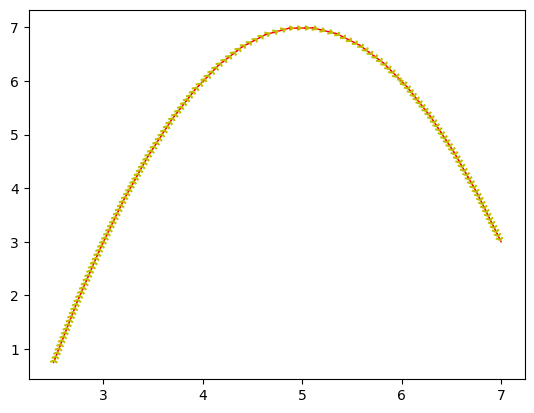

In [8]:
# check direction of segments
mt.PlotBoundary(poi,cseg[0],'Segments')
plt.show()

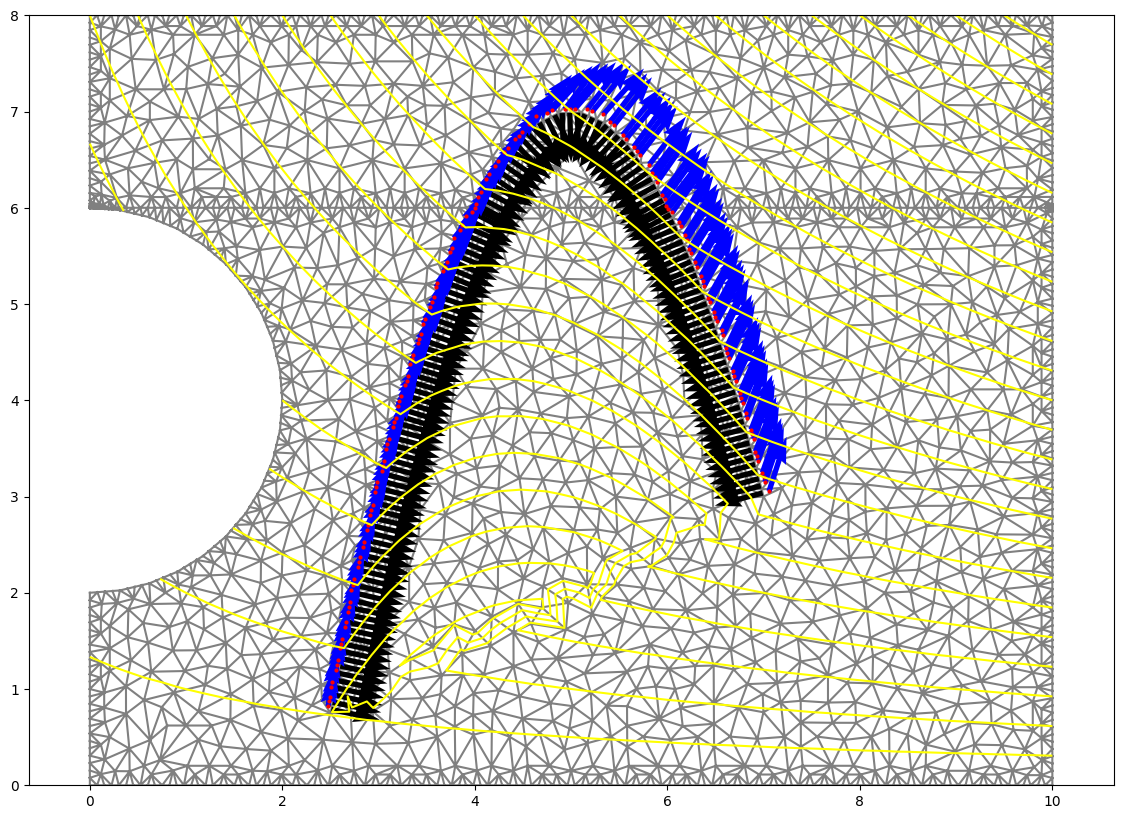

In [36]:
this_seg=cseg[0]
a,b,c,dd = mt.NormalDerivative(this_seg,poi,tri,phi,details=True,inner='left')

# or for the bounbary uncomment
#this_seg=bseg[0]
#a,b,c,dd = mt.NormalDerivative(this_seg,poi,tri,phi,details=True,BouE=bou_elem)



plt.figure(figsize=(14,10))

# indicate triangles used 
plt.triplot(poi[:,0],poi[:,1],tri,color='gray')

ppe=np.sum(poi[dd['elements']],axis=1)/3.
plt.plot( ppe[:,0],ppe[:,1],'or',markersize=2)

# normal vectors
ppn=np.sum(poi[this_seg],axis=1)/2.
plt.quiver(ppn[:,0],ppn[:,1],dd['normals'][:,0],dd['normals'][:,1])

plt.quiver(ppe[:,0],ppe[:,1],dd['gradients'][:,0],dd['gradients'][:,1],color='blue')

plt.tricontour(poi[:,0],poi[:,1],tri,phi,levels=30,colors='yellow')

plt.axis('equal');
plt.show()



##### Problem:

Compute numerically an approximation of

$$
(i) \;\;\int\limits_{inner\, right} (x+y)\left(\; -\frac{\partial \Phi}{\partial y} \;,\; 4\frac{\partial \Phi}{\partial x} \;\right)\cdot\vec{n}\; ds \qquad\qquad 
(ii) \;\;\int\limits_{inner\, left} \begin{pmatrix} a & b\\b &-a \end{pmatrix}\cdot\vec{n}\;ds \quad \mbox{with}\;\; a=\left(\frac{\partial \Phi}{\partial x}\right)^2-\left(\frac{\partial \Phi}{\partial y}\right)^2 \;\;
\mbox{and} \;\; b=\frac{\partial \Phi}{\partial x}\frac{\partial \Phi}{\partial y}
$$

using scipy.integrate.simps()

Result: 

(i) 876.2984

(ii) [-106.499835 , -192.0202299]